In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
df=pd.read_csv('clean_data.csv')

In [3]:
df

,suicides/100k pop,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,18.88,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,0,1
1,7.66,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,1,0,0,0
2,6.25,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,1,0
3,5.23,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,1,0,0,0,0,0,0,1
4,5.22,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,2.96,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,1,0,0,0
6532,2.58,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,0,0,1
6533,2.17,6.049,8.659,0.952,64.0,0.954,0.061,0.536,0,1,0,0,0,1,0,0
6534,1.67,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,1,0,0


In [4]:
x = df.drop(columns=['suicides/100k pop'])
x.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,0,1
1,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,1,0,0,0
2,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,1,0
3,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,1,0,0,0,0,0,0,1
4,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,1,0,0,0,0


In [5]:
y = df['suicides/100k pop']
y.head()

0    18.88
1     7.66
2     6.25
3     5.23
4     5.22
Name: suicides/100k pop, dtype: float64

# Linear Regression

## Linear Regression Multiple Variable

In [27]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=37)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

Intercept of Regression 	: b =  -36.599355738659305
Coefficients of Regression 	: a =  [ -2.10705822   3.57090816  42.51583623  -0.14666195  -2.87417186
 -12.50106799   0.60883562  -7.44885335   7.44885335  -3.50286742
  -0.95614953   2.34002769 -11.26301125   3.29477915  10.08722136]



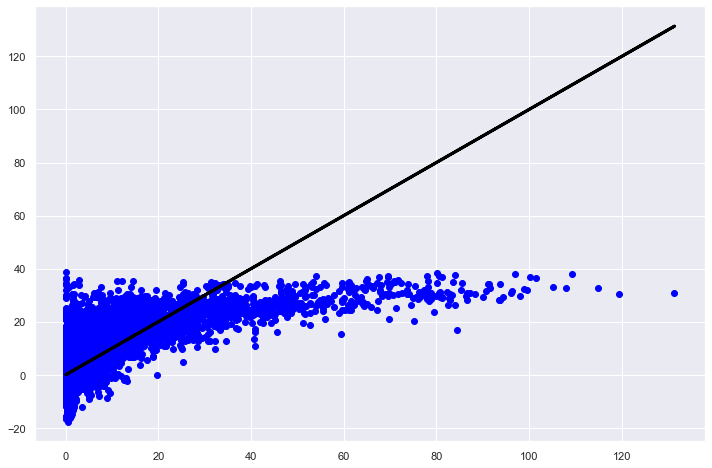

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43560490411395203
Mean Squared Error (MSE) 	: 145.6927231966317



In [28]:
# Plot the Predictions vs the True values
f = plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train, y_train, 'black', linewidth = 3)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

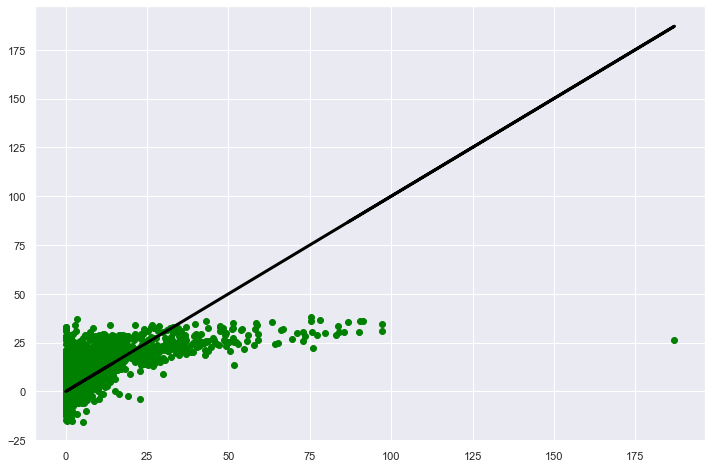

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3792488372840963
Mean Squared Error (MSE) 	: 142.24942348244423



In [29]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Linear Regression 1 Variable

### Sex

In [31]:
x

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,0,1
1,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,1,0,0,0
2,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,1,0
3,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,1,0,0,0,0,0,0,1
4,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,1,0,0,0
6532,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,0,0,1
6533,6.049,8.659,0.952,64.0,0.954,0.061,0.536,0,1,0,0,0,1,0,0
6534,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,1,0,0


In [33]:
sex_x=x[columns=['sex_female','sex_male']
x_train, x_test, y_train, y_test = train_test_split(sex_x, y, test_size = 0.25, random_state=37)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

SyntaxError: invalid syntax (<ipython-input-33-2176ff2ffb93>, line 1)

In [ ]:
# Plot the Predictions vs the True values
f = plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train, y_train, 'black', linewidth = 3)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Age Bracket

### Sex and Age Bracket

---
# KNeighbourhoodRegressor

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.cluster import KMeans

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

In [9]:
k_arr = []
for i in range(1,20,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    k_arr.append((i, test_score ,train_score))
dataframe_arr = pd.DataFrame(k_arr, columns=['K','Test Score','Train Score'])
print(dataframe_arr)

     K  Test Score  Train Score
0    1    0.694329     1.000000
1    2    0.742922     0.936392
2    3    0.745488     0.901297
3    4    0.716032     0.875546
4    5    0.719193     0.859926
5    6    0.698508     0.845824
6    7    0.686313     0.831741
7    8    0.670339     0.819746
8    9    0.654575     0.809009
9   10    0.644797     0.796193
10  11    0.637224     0.786588
11  12    0.624867     0.775329
12  13    0.617904     0.766860
13  14    0.604935     0.757488
14  15    0.600602     0.751433
15  16    0.601194     0.743407
16  17    0.601189     0.736540
17  18    0.595092     0.730902
18  19    0.587692     0.722523


In [10]:
rmse_arr = [] #to store rmse values for different k
for i in range(20):
    i = i+1
    model = KNeighborsRegressor(n_neighbors = i)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    err = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_arr.append(err) #store rmse values
    print(f'Root Mean Square Error for k={i}: {err}')

Root Mean Square Error for k=1: 7.886251158785747
Root Mean Square Error for k=2: 7.232295394569551
Root Mean Square Error for k=3: 7.196109154298901
Root Mean Square Error for k=4: 7.601126223038444
Root Mean Square Error for k=5: 7.558700653068034
Root Mean Square Error for k=6: 7.832151311907411
Root Mean Square Error for k=7: 7.988990118822401
Root Mean Square Error for k=8: 8.189877065015732
Root Mean Square Error for k=9: 8.38339494238435
Root Mean Square Error for k=10: 8.50122620292884
Root Mean Square Error for k=11: 8.591368213200216
Root Mean Square Error for k=12: 8.736474254129782
Root Mean Square Error for k=13: 8.817177599615125
Root Mean Square Error for k=14: 8.965561928813234
Root Mean Square Error for k=15: 9.014592800669126
Root Mean Square Error for k=16: 9.007907091708626
Root Mean Square Error for k=17: 9.007965579233161
Root Mean Square Error for k=18: 9.076562642165651
Root Mean Square Error for k=19: 9.159124253811038
Root Mean Square Error for k=20: 9.1932743

<AxesSubplot:>

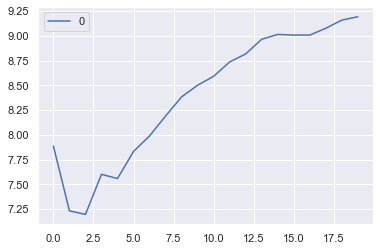

In [11]:
f = pd.DataFrame(rmse_arr) #elbow curve 
f.plot()

In [12]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [13]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
y_predict=knn.predict(x_test)

In [15]:
r2_score(y_predict,y_test)

0.7237035459470225

Plot ypred vs y test

---
# Random Forest Regressor

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
print(f"Train:{rf.score(x_train,y_train)} Test:{rf.score(x_test,y_test)}")

Train:0.9765825999802246 Test:0.7743639141083507


In [20]:
y_predict=rf.predict(x_test)
r2_score(y_predict,y_test)

0.752222114054532